In [ ]:
#Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from urllib.parse import urlencode
from matplotlib.patches import Rectangle
from matplotlib import gridspec
from matplotlib import rcParams

In [ ]:
#functions
def file_load(link,sep): #load data from yandex disk
    base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
    public_key = link 
    final_url = base_url + urlencode(dict(public_key=public_key))
    response = requests.get(final_url)
    download_url = response.json()['href']
    df = pd.read_csv(download_url, sep=sep)
    return df
        
def columns_group(df,list_dict):
    for i in list_dict:
        list_col=list(i.keys())
        for j, val in enumerate(list_col[:-1]):
            df[i[val]]=df[list_col[j:]].sum(axis=1)
        
def column_group_total(df,list_col):
    for i in list_col:
        df[i+'_Total'] = df[df.columns[df.columns.str.contains(i)]].sum(axis=1)

def heatmap_q (df, ax, order_q, order_q_short, title):
    sns.heatmap(df.loc[order_q], center=0, cmap="vlag", ax=ax, annot=True, cbar=False, yticklabels=order_q_short)
    ax.add_patch(Rectangle((0,df.loc[order_q].reset_index()['EmancipVal'].idxmax()),1,1, fill=False, edgecolor='white', lw=3))
    ax.set(title=title)  

def scatter_country(df,list_y, list_ylabel, list_title, list_annot, figsize1):
    fig, ax=plt.subplots(1,len(list_y),figsize=figsize1)
    for i, val in enumerate(list_y):
        sns.scatterplot(data=df, x='EmancipVal',y=val, hue = 'Grp', palette=palette_country_grp, legend=False, ax=ax[i])
        #ax[i].axhline(df[val].mean(), color='gray', linewidth=1)
        ax[i].set(title=list_title[i],ylabel=list_ylabel[i])
        ax[i].spines['right'].set_color('none')
        ax[i].spines['top'].set_color('none')
        for val2 in list_annot[i]:
            ind=df[df.Country==val2].index[0]
            ax[i].annotate(df2['Country'].loc[ind], (df2['EmancipVal'].loc[ind], df2[val].loc[ind]+0.008)) 
    fig.tight_layout()

def bars_by_grp (df1,df2,col, order_x, title1,title2):    
    d=pd.DataFrame(df1.groupby(['Grp',col])[col].count().div(df1.groupby(['Grp'])[col].count())).rename(columns={col: 'Distribution'}).reset_index()
    g = sns.FacetGrid(data=d, col="Grp", hue="Grp", gridspec_kws={"wspace":0}, palette=palette_country_grp, col_order=['LOW','MIDDLE','HIGH'])
    g.map(sns.barplot, col, "Distribution", order = order_x)
    g.set_xticklabels(rotation=90)
    ttl=g.fig.suptitle(title1)
    ttl.set_position([.5, 1.05])
    #g.set_frame_on(False)
    d=pd.DataFrame((df1.groupby(['Grp',col])[col].count().div(df1.groupby(['Grp'])[col].count())-\
     df2.groupby([col])[col].count().div(df2[col].count()))).rename(columns={col: 'Distribution'}).reset_index()
    g = sns.FacetGrid(data=d, col="Grp", hue="Grp", gridspec_kws={"wspace":0}, palette=palette_country_grp, col_order=['LOW','MIDDLE','HIGH'])
    g.map(sns.barplot, col, "Distribution", order = order_x)
    g.set_xticklabels(rotation=90)
    ttl=g.fig.suptitle(title2)
    ttl.set_position([.5, 1.05])

In [ ]:
#dictionaries and variabels
palette_country_grp=['#f28830','#c6c6c6','#008294']

rcParams['axes.titlesize']=15
rcParams['axes.labelsize']=12
rcParams['axes.titlepad']=10
rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False

dict_country={'Russian':'Russia','Taiwan ROC':'Taiwan','Hong Kong SAR':'Hong Kong','United Kingdom of Great Britain and Northern Ireland':'United Kingdom', 'United States of America':'United States', \
    'Hong Kong (S.A.R.)':'Hong Kong', 'Iran, Islamic Republic of...':'Iran', 'Viet Nam':'Vietnam',
    'Czech Rep.':'Czech Republic','Hong Kong, China':'Hong Kong','Macao, China':'Macao','Korea, Rep.':'South Korea','Dominican Rep.':'Dominican Republic'
             , 'Czech Republic (Czechia)':'Czech Republic'
             ,'Czechia':'Czech Republic','Hong Kong China (SAR)':'Hong Kong',' Hong Kong, China (SAR)':'Hong Kong','Iran (Islamic Republic of)':'Iran','Korea (Republic of)':'South Korea','Russian Federation':'Russia','Viet Nam':'Vietnam'}

dict_q1={'Q1_25-29':'Q1_25+','Q1_30-34':'Q1_30+', 'Q1_35-39':'Q1_35+','Q1_40-44':'Q1_40+','Q1_45-49':'Q1_45+',
       'Q1_50-54':'Q1_50+','Q1_55-59':'Q1_55+','Q1_60-69':'Q1_60+','Q1_70+':'Q1_40+'}
dict_q6={'Q6_1-3 years':'Q6_1+ years','Q6_3-5 years':'Q6_3+ years','Q6_5-10 years':'Q6_5+ years',
       'Q6_10-20 years':'Q6_10+ years','Q6_20+ years':'Q6_20+ years'}
dict_q13={'Q13_2-5 times':'Q13_2+ times','Q13_6-25 times':'Q13_6+ times', 'Q13_More than 25 times':'Q13_25+ times'}
dict_q15={'Q15_1-2 years':'Q15_1+ years','Q15_2-3 years':'Q15_2+ years','Q15_3-4 years':'Q15_3+ years',
       'Q15_4-5 years':'Q15_4+ years','Q15_5-10 years':'Q15_5+ years','Q15_10-20 years':'Q15_10+ years','Q15_20 or more years':'Q15_20+ years'}
dict_q21={'Q21_250-999 employees':'Q21_250+ employees','Q21_1000-9,999 employees':'Q21_1000+ employees',
       'Q21_10,000 or more employees':'Q21_10000+ employees'}
dict_q22={'Q22_3-4':'Q22_3+','Q22_5-9':'Q22_5+','Q22_10-14':'Q22_10+','Q22_15-19':'Q22_15+', 'Q22_20+':'Q22_20+'}
dict_q25={'Q25_2,000-2,999':'Q25_2,000$+', 'Q25_3,000-3,999':'Q25_3,000$+', 'Q25_4,000-4,999':'Q25_4,000$+', 'Q25_5,000-7,499':'Q25_5,000$+', 
       'Q25_7,500-9,999':'Q25_7,000$+',
       'Q25_10,000-14,999':'Q25_10,000$+','Q25_15,000-19,999':'Q25_15,000$+', 'Q25_20,000-24,999':'Q25_20,000$+', 'Q25_25,000-29,999':'Q25_25,000$+',
       'Q25_30,000-39,999':'Q25_30,000$+', 'Q25_40,000-49,999':'Q25_40,000$+', 'Q25_50,000-59,999':'Q25_50,000$+', 'Q25_60,000-69,999':'Q25_60,000$+', 
       'Q25_70,000-79,999':'Q25_70,000$+', 'Q25_80,000-89,999':'Q25_80,000$+', 'Q25_90,000-99,999':'Q25_90,000$+','Q25_100,000-124,999':'Q25_100,000$+', 
       'Q25_125,000-149,999':'Q25_125,000$+',  'Q25_150,000-199,999':'Q25_150,000$+', 'Q25_200,000-249,999':'Q25_200,000$+',  'Q25_250,000-299,999':'Q25_250,000$+', 
       'Q25_300,000-499,999':'Q25_300,000$+', 'Q25_$500,000-999,999':'Q25_500,000$+','Q25_>$1,000,000':'Q25_$1,000,000$+'}
dict_q26={'Q26_$100-$999':'Q26_$100+', 'Q26_$1000-$9,999':'Q26_$1000+', 'Q26_$10,000-$99,999':'Q26_$10,000+', 'Q26_$100,000 or more ($USD)':'Q26_$100,000+'}

order_q1=['Q1_18-21','Q1_22-24','Q1_25-29','Q1_30-34','Q1_35-39','Q1_40-44','Q1_45-49','Q1_50-54',
    'Q1_55-59','Q1_60-69','Q1_25+','Q1_30+','Q1_35+','Q1_40+','Q1_45+','Q1_50+','Q1_55+','Q1_60+','Q1_70+']
order_q1_short=['18-21','22-24','25-29','30-34','35-39','40-44','45-49','50-54',
    '55-59','60-69','25+','30+','35+','40+','45+','50+','55+','60+','70+']

order_q6=['Q6_I have never written code','Q6_< 1 years','Q6_1-3 years', 'Q6_3-5 years','Q6_5-10 years','Q6_10-20 years',
 'Q6_1+ years','Q6_3+ years','Q6_5+ years','Q6_10+ years','Q6_20+ years']
order_q6_short=['I have never written code','< 1 years','1-3 years', '3-5 years','5-10 years','10-20 years',
 '1+ years','3+ years','5+ years','10+ years','20+ years']

order_q15=[ 'Q15_I do not use machine learning methods','Q15_Under 1 year','Q15_1-2 years','Q15_2-3 years',
 'Q15_3-4 years','Q15_4-5 years','Q15_5-10 years','Q15_10-20 years','Q15_1+ years','Q15_2+ years','Q15_3+ years','Q15_4+ years','Q15_5+ years',
 'Q15_10+ years', 'Q15_20 or more years']
order_q15_short=[ 'I do not use ML methods','Under 1 year','1-2 years','2-3 years',
 '3-4 years','4-5 years','5-10 years','10-20 years','1+ years','2+ years','3+ years','4+ years','5+ years',
 '10+ years', '20 or more years']

order_q22=['Q22_0', 'Q22_1-2','Q22_3-4', 'Q22_5-9', 'Q22_10-14', 'Q22_15-19', 'Q22_3+', 'Q22_5+', 'Q22_10+', 'Q22_15+', 'Q22_20+']
order_q22_short=['0', '1-2','3-4', '5-9', '10-14', '15-19', '3+', '5+', '10+', '15+', '20+']

order_q23=['Q23_I do not know', 'Q23_No (we do not use ML methods)',
        'Q23_We use ML methods for generating insights (but do not put working models into production)',
       'Q23_We are exploring ML methods (and may one day put a model into production)',
       'Q23_We recently started using ML methods (i.e., models in production for less than 2 years)',
       'Q23_We have well established ML methods (i.e., models in production for more than 2 years)'
       ]
order_q24=['Q24_Part_1_Analyze and understand data to influence product or business decisions',
       'Q24_Part_2_Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data',
       'Q24_Part_3_Build prototypes to explore applying machine learning to new areas',
       'Q24_Part_4_Build and/or run a machine learning service that operationally improves my product or workflows',
       'Q24_Part_5_Experimentation and iteration to improve existing ML models',
       'Q24_Part_6_Do research that advances the state of the art of machine learning',
       'Q24_Part_7_None of these activities are an important part of my role at work',
       'Q24_OTHER_Other', 'Q24__Total']

order_q23_short=['I do not know', 'Do not use',
        'For generating insights',
       'We are exploring ML methods',
       'Models in production for less than 2 years',
       'Models in production for more than 2 years'
       ]
order_q24_short=['Analyze and understand data',
       'Build and/or run the data infrastructure',
       'Build prototypes to explore applying machine learning to new areas',
       'Build and/or run a machine learning service',
       'Experimentation to improve existing ML models',
       'Do research that advances the state of the art of machine learning',
       'None of these activities',
       'Other', 'Total']

order_q25 = ['Q25_$0-999',  'Q25_1,000-1,999', 'Q25_2,000-2,999', 'Q25_3,000-3,999', 'Q25_4,000-4,999','Q25_5,000-7,499','Q25_7,500-9,999',
       'Q25_10,000-14,999','Q25_15,000-19,999','Q25_20,000-24,999', 'Q25_25,000-29,999','Q25_30,000-39,999', 'Q25_40,000-49,999', 'Q25_50,000-59,999', 'Q25_60,000-69,999',
        'Q25_70,000-79,999', 'Q25_80,000-89,999','Q25_90,000-99,999','Q25_100,000-124,999', 'Q25_125,000-149,999',
        'Q25_150,000-199,999','Q25_200,000-249,999', 'Q25_250,000-299,999', 'Q25_300,000-499,999', 'Q25_$500,000-999,999', 
        'Q25_2,000$+', 'Q25_3,000$+','Q25_4,000$+', 'Q25_5,000$+', 'Q25_7,000$+', 'Q25_10,000$+','Q25_15,000$+', 'Q25_20,000$+', 'Q25_25,000$+', 'Q25_30,000$+',
       'Q25_40,000$+', 'Q25_50,000$+', 'Q25_60,000$+', 'Q25_70,000$+','Q25_80,000$+', 'Q25_90,000$+', 'Q25_100,000$+', 'Q25_125,000$+',
       'Q25_150,000$+', 'Q25_200,000$+', 'Q25_250,000$+', 'Q25_300,000$+','Q25_500,000$+', 'Q25_>$1,000,000']
order_q25_1 = ['Q25_$0-999',  'Q25_1,000-1,999', 'Q25_2,000-2,999', 'Q25_3,000-3,999', 'Q25_4,000-4,999','Q25_5,000-7,499','Q25_7,500-9,999',
       'Q25_10,000-14,999','Q25_15,000-19,999','Q25_20,000-24,999', 'Q25_25,000-29,999','Q25_30,000-39,999', 'Q25_40,000-49,999', 'Q25_50,000-59,999', 'Q25_60,000-69,999',
        'Q25_70,000-79,999', 'Q25_80,000-89,999','Q25_90,000-99,999','Q25_100,000-124,999', 'Q25_125,000-149,999',
        'Q25_150,000-199,999','Q25_200,000-249,999', 'Q25_250,000-299,999', 'Q25_300,000-499,999', 'Q25_$500,000-999,999']
order_q25_2 = ['Q25_2,000$+', 'Q25_3,000$+','Q25_4,000$+', 'Q25_5,000$+', 'Q25_7,000$+', 'Q25_10,000$+','Q25_15,000$+', 'Q25_20,000$+', 'Q25_25,000$+', 'Q25_30,000$+',
       'Q25_40,000$+', 'Q25_50,000$+', 'Q25_60,000$+', 'Q25_70,000$+','Q25_80,000$+', 'Q25_90,000$+', 'Q25_100,000$+', 'Q25_125,000$+',
       'Q25_150,000$+', 'Q25_200,000$+', 'Q25_250,000$+', 'Q25_300,000$+','Q25_500,000$+', 'Q25_>$1,000,000']
order_q26 =['Q26_$0 ($USD)', 'Q26_$1-$99', 'Q26_$100-$999', 'Q26_$1000-$9,999', 'Q26_$10,000-$99,999',     
       'Q26_$100+', 'Q26_$1000+', 'Q26_$10,000+','Q26_$100,000 or more ($USD)']
order_q26_short =['$0 ($USD)', '$1-$99', '$100-$999', '$1000-$9,999', '$10,000-$99,999',     
       '$100+', '$1000+', '$10,000+','$100,000 or more ($USD)']

order_q25_short = ['$0-999',  '1,000-1,999', '2,000-2,999', '3,000-3,999', '4,000-4,999','5,000-7,499','7,500-9,999',
       '10,000-14,999','15,000-19,999','20,000-24,999', '25,000-29,999','30,000-39,999', '40,000-49,999', '50,000-59,999', '60,000-69,999',
        '70,000-79,999', '80,000-89,999','90,000-99,999','100,000-124,999', '125,000-149,999',
        '150,000-199,999','200,000-249,999', '250,000-299,999', '300,000-499,999', '$500,000-999,999', 
        '2,000$+', '3,000$+','4,000$+', '5,000$+', '7,000$+', '10,000$+','15,000$+', '20,000$+', '25,000$+', '30,000$+',
       '40,000$+', '50,000$+', '60,000$+', '70,000$+','80,000$+', '90,000$+', '100,000$+', '125,000$+',
       '150,000$+', '200,000$+', '250,000$+', '300,000$+','500,000$+', '>$1,000,000']
order_q25_1_short = ['$0-999',  '1,000-1,999', '2,000-2,999', '3,000-3,999', '4,000-4,999','5,000-7,499','7,500-9,999',
       '10,000-14,999','15,000-19,999','20,000-24,999', '25,000-29,999','30,000-39,999', '40,000-49,999', '50,000-59,999', '60,000-69,999',
        '70,000-79,999', '80,000-89,999','90,000-99,999','100,000-124,999', '125,000-149,999',
        '150,000-199,999','200,000-249,999', '250,000-299,999', '300,000-499,999', '$500,000-999,999']
order_q25_2_short = ['2,000$+', '3,000$+','4,000$+', '5,000$+', '7,000$+', '10,000$+','15,000$+', '20,000$+', '25,000$+', '30,000$+',
       '40,000$+', '50,000$+', '60,000$+', '70,000$+','80,000$+', '90,000$+', '100,000$+', '125,000$+',
       '150,000$+', '200,000$+', '250,000$+', '300,000$+','500,000$+', '>$1,000,000']
order_q26_short =['$0 ($USD)', '$1-$99', '$100-$999', '$1000-$9,999', '$10,000-$99,999',     
       '$100+', '$1000+', '$10,000+','$100,000 or more ($USD)']


In [ ]:
#data load and transform
df_responses = pd.read_csv('/kaggle/input/kaggle-survey-2021/kaggle_survey_2021_responses.csv') #kaggle survey 
df_questions=df_responses[0:1].T
df_responses=df_responses[1:]
df_responses['Q3'].replace(dict_country, inplace=True)

#WVS data World cultural map values from https://www.worldvaluessurvey.org/WVSNewsShow.jsp?ID=428 (CulturalMapFinalEVSWVS_1981-2021_v20201102.xls)
df_world_values = file_load('https://disk.yandex.ru/d/Uk3vy-7swzeB4w' ,',') 
df_world_values['SurvSelfVal'] = df_world_values.SurvSAgg.replace({',': '.'}, regex=True).astype(float)
df_world_values['TradSecVal'] = df_world_values.TradAgg.replace({',': '.'}, regex=True).astype(float)
df_world_values['Country'].replace(dict_country, inplace = True)
df_world_values = pd.merge(df_world_values,df_world_values.groupby(['Country'])['year'].max('year'),how = 'left', right_index=True, left_on = 'Country')
df_world_values = df_world_values[(df_world_values['year_x']==df_world_values['year_y'])&(df_world_values['year_x']>2000)][['Country','SurvSelfVal','TradSecVal']]

#WVS data Welzel values from https://www.worldvaluessurvey.org/WVSNewsShow.jsp?ID=428 (CulturalMapFinalEVSWVS_1981-2021_v20201102.xls)
df_welzel = file_load('https://disk.yandex.ru/d/EXooh-fIJMAnDA' ,',') 
df_welzel['SecularVal'] = df_welzel['SACSECVAL'].astype(float)
df_welzel['EmancipVal'] = df_welzel['RESEMAVAL'].astype(float)
df_welzel['Country'].replace(dict_country, inplace = True)
df_welzel = pd.merge(df_welzel,df_welzel.groupby(['Country'])['year'].max('year'),how = 'left', on = 'Country')
df_welzel = df_welzel[(df_welzel['year_x']==df_welzel['year_y'])&(df_welzel['year_x']>2000)][['Country','EmancipVal','SecularVal']]

#Indexes by counties
df_quality_of_life = pd.read_csv('/kaggle/input/countries-dataset-2020/Quality of life index by countries 2020.csv')
df_quality_of_life=df_quality_of_life[['Country','Quality of Life Index','Purchasing Power Index','Cost of Living Index']]

#Share of people above 65 by countries
df_age_structure = pd.read_csv('/kaggle/input/countries-dataset-2020/Coutries age structure.csv')
df_age_structure['Above65']=(100- df_age_structure['Age 0 to 14 Years'].replace('%','', regex=True).astype(float)\
                              -df_age_structure['Age 15 to 64 Years'].replace('%','', regex=True).astype(float))/100
df_age_structure=df_age_structure[['Country','Above65']]

#Median age by countries
df_median_age = pd.read_csv('/kaggle/input/average-age-of-countries/MedianAge.csv')
df_median_age.replace(dict_country, inplace = True)
df_median_age=df_median_age[['Country','2020']]

#Population and median age by countries
df_population = pd.read_csv('/kaggle/input/population-by-country-2020/population_by_country_2020.csv')
df_population.rename(columns={'Country (or dependency)': 'Country','Population (2020)':'Population'}, inplace = True)
df_population.replace(dict_country, inplace = True)
df_population = pd.merge(df_population,df_median_age, how='left', on='Country')
df_population['MedAge']=df_population['2020'].fillna(df_population['Med. Age'])
df_population=df_population[['Country','MedAge','Population']]

In [ ]:
#Preparing data sets
df2=pd.get_dummies(df_responses,columns=df_responses.columns.drop(['Q3','Time from Start to Finish (seconds)'])).groupby('Q3').sum()
df2['RespCnt']=df2['Q2_Man']+df2['Q2_Nonbinary']+df2['Q2_Prefer not to say']+df2['Q2_Prefer to self-describe']+df2['Q2_Woman']

df2=df2[df2.columns[0:-1]].div(df2.RespCnt, axis=0)
columns_group(df2,[dict_q1,dict_q6,dict_q13,dict_q15,dict_q21,dict_q22,dict_q25,dict_q26])
list1=['Q7_','Q9_','Q10_','Q12_','Q14_','Q16_','Q17_','Q18_','Q19_','Q24_','Q39_','Q40_','Q42_','Q27_A','Q29_A','Q30_A','Q31_A','Q32_A','Q34_A','Q36_A','Q37_A','Q38_A','Q27_B','Q29_B','Q30_B','Q31_B','Q32_B','Q34_B','Q36_B','Q37_B','Q38_B',]
column_group_total(df2,list1)

df2.index.rename('Country',inplace=True)
df2.reset_index(inplace=True)

df3=pd.merge(pd.DataFrame(df2.Country).rename(columns={'Q3':'Country'}),df_world_values, how='left', on ='Country')
df3=pd.merge(df3,df_welzel, how='left', on ='Country')
df3=pd.merge(df3,df_quality_of_life, how='left', on ='Country')
df3=pd.merge(df3,df_age_structure, how='left', on ='Country')
df3=pd.merge(df3,df_population, how='left', on ='Country')
df3=pd.merge(df3,pd.DataFrame(df_responses.groupby(['Q3'])['Q3'].count()).rename(columns={'Q3':'RespCnt'}), how='left', left_on ='Country', right_index=True)
df3['RespShare']=df3['RespCnt']/df3['Population']
df_indexes=df3
df3=pd.merge(df3,df2, how='left', on ='Country')

df_corr1=df3.dropna().corr('spearman')[:8].T
df3=df_corr1.abs()
df3['QNum']=df3.index.str.replace('_B_','B_').str.rsplit('_').str[0]
df3=pd.merge(pd.DataFrame(df_responses.columns.str.replace('_B_','B_').str.rsplit('_').str[0].drop_duplicates()[1:]),df3.groupby(['QNum']).max(),left_on=0,right_on='QNum')
df3.set_index(0,inplace=True)

df2=pd.merge(df_indexes[['Country','EmancipVal','RespShare']],df2, how='right', on ='Country')
df2.insert(2,'Grp','MIDDLE')
df2.loc[df2.Country.isin(df2.sort_values('EmancipVal').head(20).Country), 'Grp'] = 'LOW'
df2.loc[df2.Country.isin(df2.sort_values('EmancipVal',ascending=False).head(20).Country), 'Grp'] = 'HIGH'
df2.sort_values(by=['EmancipVal'],inplace = True,ascending=False)

df1=pd.merge(df2[['Country','Grp','EmancipVal']].dropna(),df_responses, how='inner',left_on='Country',right_on='Q3')
df_corr=df2.set_index('Country').corr('spearman')[:1].T

# World Values and Data Science Community

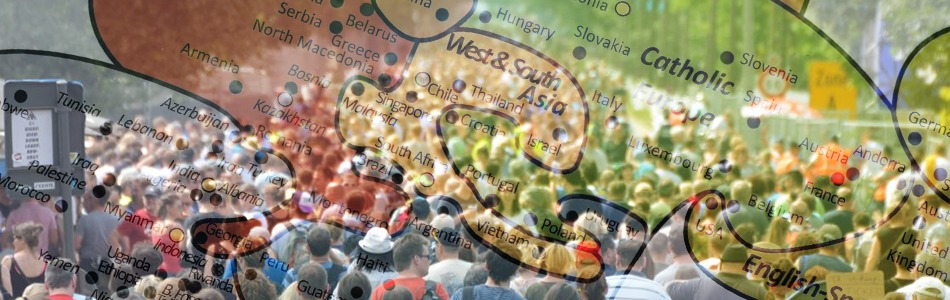

## Introduction

The World Values Survey (WVS) is a global research project that explores people's values and beliefs, how they change over time, and what social and political impact they have. Since 1981 a worldwide network of social scientists have conducted representative national surveys as part of WVS in almost 100 countries.

Analysis of WVS data made by political scientists Ronald Inglehart and Christian Welzel asserts that there are two major dimensions of cross cultural variation in the world:
* Traditional values versus secular-rational values and
* Survival values versus self-expression values

Christian Welzel also introduced the concepts of emancipative values and secular values. Emancipative values are an updated version of self-expression values. Secular values are an updated version of traditional versus secular rational values.[2]

How do you think there is any connection between these values and the DS community?

## The main value

Let's compare the characteristics of the countries with the responses of kaggle survey 2021.
For comparison, let's take four values from the WVS:
* Traditional values versus secular-rational values (**TradSecVal**) [1]
* Survival values versus self-expression values (**SurvSelfVal**) [1]
* Sacred versus secural values (**SecularVal**) [1]
* Obedient versus emancipative values (**EmancipVal**) [1]

Additionally, we will take several parameters from other sources:
* Quality of Life Index[3]
* Purchasing Power Index[3]
* Cost of Living Index[3]
* Median age by country (**MedAge**)
* The proportion of people over 65 by country (**Above65**)

It turns out that the Kaggle Survey data correlate most with the **EmancipVal**, **Quality of Life Index** and **Above65** indicators. But this is based on the number of questions. At the same time, **EmancipVal** has the strongest correlation on most issues.

In [ ]:
df=df3.loc[df3[((df3>=0.7)&(df3<1))|(df3<=-0.7)].dropna(how='all').index.to_list()].T
fig,ax = plt.subplots(1,3, figsize=(25, 3), facecolor='w', edgecolor='k', gridspec_kw={'width_ratios': [1.5,1,4]})
sns.heatmap(df, cmap="flare", ax=ax[2])
ax[2].set_title('Correlation (white box means max by question)') 

val_max = df.idxmax(axis=0)
col_q = df.columns

df[df>0.7].T.count().plot.bar(color='#702663', ax=ax[0])
ax[0].set_title('Count of questions with correlation >0.7')

val_max.value_counts().plot.bar(color='#702663', ax=ax[1])
ax[1].set_title('Number of questions with max correlation')

for col, variable in enumerate(col_q):
    position = df.index.get_loc(val_max[variable])
    ax[2].add_patch(Rectangle((col, position),1,1, fill=False, edgecolor='white', lw=1))
  

fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.3)

Let's look at the main dependencies (with a correlation greater than 0.8).

## Main dependencies

To begin with, we will divide the countries according to the increasing **EmancipVal** into 3 groups: low medium and high.
We know the index for 60 countries out of 64 countries in the Kaggle Survey, so we get three equal groups.

In [ ]:
df=df2[['Country','EmancipVal','Grp']].dropna(axis=0)
list_grp=['HIGH','MIDDLE','LOW']
f, ax = plt.subplots(1, 3, figsize=(15,8))
for i, var in enumerate(list_grp):
    sns.barplot(x=df[df.Grp==var]['EmancipVal'], y=df[df.Grp==var]['Country'], palette=[palette_country_grp[i]], ax=ax[i])
    ax[i].set(title=var,xlim=(0,0.8),ylabel=None)
f.tight_layout()

Let's take the first three parameters: age, experience in programming and experience in machine learning. The tables below show which groups of respondents have the strongest connection with values.
By age, the largest correlation is in the **40+ group**. By experience in programming the largest correlation is in the **5+ years group**. By experience in ML the largest correlation is in the **3+ years group**.

In [ ]:
fig = plt.figure(figsize =(20,3))
gs1 = fig.add_gridspec(1,1,bottom = -1, left=0.05, right=0.1, wspace=0.05)
ax1 = plt.subplot(gs1[0,0])
gs2 = fig.add_gridspec(1,1,bottom = -0.5,left=0.3, right=0.35, wspace=0.05)
ax2 = plt.subplot(gs2[0,0])
gs3 = fig.add_gridspec(1,1,bottom = -0.7,left=0.55, right=0.6, wspace=0.05)
ax3 = plt.subplot(gs3[0,0])

heatmap_q (df_corr, ax1, order_q1, order_q1_short, 'Q1 Age')
heatmap_q (df_corr, ax2, order_q6, order_q6_short, 'Q6 Writing code and/or programming')
heatmap_q (df_corr, ax3, order_q15, order_q15_short, 'Q15 Using machine learning methods')

Let's look at the graphs for the groups with the strongest correlation. The graphs show that there really is a linear relationship.

There are also outliers: in **Germany** and **Denmark**, the proportion of respondents aged **40+** is less than in countries with a similar index. **Denmark** has a smaller proportion of people in programming for **longer than 5 years**. **Japan** has a smaller proportion of people in ML for **longer than 3 years**. In **Iraq**, a large proportion of people with **programming and ML experience**, but this may be due to a small number of respondents (43 people). A large proportion of the **40+** group in **Ecuador** may also be associated with a small number of respondents.


In [ ]:
list_annot=[['China','Ecuador','Germany','Czech Republic','Denmark'] ,['Iraq','Ethiopia','Denmark'] ,['Iraq','Japan']]
list_title=['Q1 Age','Q6 Years of writing code and/or programming','Q15 Years of using machine learning methods']
scatter_country(df2,['Q1_40+','Q6_5+ years','Q15_3+ years'],['40+','5+ years','3+ years'],list_title,list_annot,(20,5))

If we look at the general situation by groups, we can see that in the **HIGH** and **MIDDLE** groups the maximum of respondents is **25-29**, while in the **LOW** group the maximum is in the **18-21** group. The strongest differences are in groups **18-21** and **22-24**.



In [ ]:
bars_by_grp(df1,df_responses,'Q1',list(df1['Q1'].sort_values().unique()),'Q1 Distribution by the coyntry groups','Difference from the total distribution')

We could consider other issues in a similar way, but we won't, because the deadline for the competition is already close, and my child wants to eat)

Therefore, let's go straight to the next group of questions. These questions relate to work: 
* Q22 Approximately how many individuals are responsible for data science workloads at your place of business?
* Q23 Does your current employer incorporate machine learning methods into their business?
* Q24 Select any activities that make up an important part of your role at work: (Select all that apply)

On **Q22**, the largest correlation is in the **5+ group**. On **Q23**, the largest correlation is in the group **"We have well established ML methods (i.e., models in production for more than 2 years)"**. On **Q24**, the largest correlation is in the **"Build prototypes to explore applying machine learning to new area"**.

In [ ]:
list_title=['Q22 Individuals are responsible for data science','Q23 ML methods into the business','Q24 Main activities at work']

fig = plt.figure(figsize =(20,2))
gs1 = fig.add_gridspec(1,1,bottom = -1, left=0.05, right=0.1, wspace=0.05)
ax1 = plt.subplot(gs1[0,0])
gs2 = fig.add_gridspec(1,1,bottom = -0.4,left=0.35, right=0.4, wspace=0.05)
ax2 = plt.subplot(gs2[0,0])
gs3 = fig.add_gridspec(1,1,bottom = -0.7,left=0.65, right=0.7, wspace=0.05)
ax3 = plt.subplot(gs3[0,0])

heatmap_q (df_corr, ax1, order_q22, order_q22_short, list_title[0])
heatmap_q (df_corr, ax2, order_q23, order_q23_short, list_title[1])
heatmap_q (df_corr, ax3, order_q24, order_q24_short, list_title[2])

Let's look at the graphs for the groups with the strongest correlation. The graphs show a linear relationship. You can also see that in the **Czech Republic** a large proportion of respondents from firms with **5+** employees in data science. In **Ecuador**, there are no respondents from firms with **well established ML methods**. And in **Romania**, a large proportion of respondents are engaged in **building prototypes to explore applying machine learning to new area**.

In [ ]:
list_annot=[['Czech Republic','Denmark'] ,['Israel','Ecuador','Japan'] ,['Romania','Japan','Sweden','Norway']]
list_y=['Q22_5+','Q23_We have well established ML methods (i.e., models in production for more than 2 years)','Q24_Part_3_Build prototypes to explore applying machine learning to new areas']
list_ylabels=['5+ employees','We have well established ML methods','Build prototypes to explore applying ML to new areas']
scatter_country(df2,list_y,list_ylabels, list_title,list_annot,(20,5))

And finally, let's move on to money. The strongest correlation for **annual compensation (Q25)** in the **20,000\$+ group**. According to **the money spent on ML and/or cloud computing services (Q26)**, the strongest correlation is in the **1000\$+ group**.

In [ ]:
fig = plt.figure(figsize =(20,3))
gs1 = fig.add_gridspec(1,1,bottom = -1, left=0.05, right=0.1, wspace=0.05)
ax1 = plt.subplot(gs1[0,0])
gs2 = fig.add_gridspec(1,1,bottom = -1,left=0.2, right=0.25, wspace=0.05)
ax2 = plt.subplot(gs2[0,0])
gs3 = fig.add_gridspec(1,1,bottom = -0.4,left=0.55, right=0.6, wspace=0.05)
ax3 = plt.subplot(gs3[0,0])

#heatmap_q (df_corr, ax1, order_q25_1, order_q25_1, 
sns.heatmap(df_corr.loc[order_q25_1], center=0, cmap="vlag", ax=ax1, annot=True, cbar=False, yticklabels=order_q25_1_short)
ax1.set(title='Q25 What is your current yearly compensation (approximate $USD)?')
heatmap_q (df_corr, ax2, order_q25_2, order_q25_2_short, '')
heatmap_q (df_corr, ax3, order_q26, order_q26_short, 'Q26 Money spent on machine learning \n and/or cloud computing services in the past 5 year')

The graph of the dependence of **EmancipVal** and the **20,000\$+ group** shows that **Saudi Arabia** has a much larger proportion of employees with salaries of **20,000\$+** than countries with a similar EmancipVal index. In **Chile** and **Ireland**, a lot of people have spent more than **$1000+** on DS over the past 5 years compared to countries similar in the index.

In [ ]:
list_annot=[['Saudi Arabia','Ireland','Norway'] ,['Ireland','Chile','Kazakhstan'] ]
list_title=['Q25 Сurrent yearly compensation','Q26 Money spent on machine learning \n and/or cloud computing services in the past 5 year']
scatter_country(df2,['Q25_20,000$+','Q26_$1000+'],['20,000$+','$1000+'],list_title,list_annot,(15,5))

## Conclusion

So, we found some dependencies, and also of course we didn't find some other dependencies. Based on this, we can assume that value characteristics **affect who** gets into the DS community. And value characteristics **do not affect the tools and methods** that data scientists use in their work.

The main conclusion is that it seems that not only economic parameters affect the DS. The value characteristics of the country is important for the formation of the DS community.

## References
1. https://www.worldvaluessurvey.org/wvs.jsp
2. https://www.numbeo.com/cost-of-living/
3. https://en.wikipedia.org/wiki/World_Values_Survey
